In [1]:
import lasio
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import pathlib
from segysak.segy import segy_header_scan,get_segy_texthead,segy_loader, well_known_byte_locs,segy_freeloader,segy_writer
import numpy as np
from scipy.interpolate import interp1d

In [3]:
## Path for seismic
S3D_path = pathlib.Path(r"C:\Users\aahmad58\Desktop\FAROOQ_CWT\FAROOQ_CWT\Seismic_thesis_520-710_cropped_2ms.sgy")
print("3D", S3D_path, S3D_path.exists())

# ##Header 
# head= get_segy_texthead(S3D_path)
# head

# default just needs the file name
# scan = segy_header_scan(S3D_path)
# scan
#scan[scan["std"] > 0]

sawan_load = segy_loader(S3D_path, iline=181, xline=185)

3D C:\Users\aahmad58\Desktop\FAROOQ_CWT\FAROOQ_CWT\Seismic_thesis_520-710_cropped_2ms.sgy True


  0%|          | 0.00/32.2k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is CDP_X


Converting SEGY:   0%|          | 0.00/32.2k [00:00<?, ? traces/s]

In [ ]:
df_seis=sawan_load.to_dataframe().reset_index()

In [ ]:
df_seis=df_seis[(df_seis['twt']>=2150) & (df_seis['twt']<=2350)]

In [5]:
#das = df_seis[df_seis["data"]!=0].index

In [6]:
seis1 = sawan_load.copy()
seis1 = seis1[["iline","xline","twt","data"]]

In [7]:
seis1 = df_seis.set_index(["iline","xline","twt"])
seis1 = seis1.to_xarray()
seis1.attrs = sawan_load.attrs


In [8]:
seis1

<xarray.Dataset>
Dimensions:  (iline: 204, xline: 158, twt: 50)
Coordinates:
  * iline    (iline) uint64 710 711 712 713 714 715 ... 908 909 910 911 912 913
  * xline    (xline) uint64 864 865 866 867 868 869 ... 1017 1018 1019 1020 1021
  * twt      (twt) float64 2.152e+03 2.156e+03 2.16e+03 ... 2.344e+03 2.348e+03
Data variables:
    data     (iline, xline, twt) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                Dataset name: Sawan\nVersion name: Mig\nSample Inter...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         Seismic_thesis_520-710_2ms.sgy
    srd:                 None
    datatype:            None
    percentiles:         [-17.053149577695876, -14.128348574664908, -2.839745...
    coord_scalar:        1.0

In [9]:
#segy_writer(seis1,'Seismic_thesis_520-710_cropped_2ms.sgy')

## Impedence data load

In [11]:
## Path for seismic
Imp3d_path = pathlib.Path(r"C:\Users\hp\Desktop\Machine learning codes\Machine learning codes\segy_vol_cropped\Imp_thesis_520-710_2ms.sgy")
print("3D", Imp3d_path, Imp3d_path.exists())

##Header 
#df= get_segy_texthead(Imp3d_path)
#df
#df[df["mean"]!=0]

# default just needs the file name
#df= segy_header_scan(Imp3d_path)
#scan_3d
#df[df["mean"]!=0]

Imp_3d_load=segy_loader(Imp3d_path,iline=17, xline=13, vert_domain='TWT')

In [5]:
df_imp=Imp_3d_load.to_dataframe().reset_index()

In [6]:
df_imp['twt']=df_imp['twt']+1900

In [7]:
df_imp=df_imp[(df_imp['twt']>=2150) & (df_imp['twt']<=2350)]

In [8]:
imp1 = df_imp.copy()
imp1 = imp1[["iline","xline","twt","data"]]

In [9]:
imp1 = imp1.set_index(["iline","xline","twt"])
imp1 = imp1.to_xarray()
imp1.attrs = Imp_3d_load.attrs

In [10]:
#segy_writer(imp1,'Impedence_thesis_520-710_cropped_2ms.sgy')

C:\Users\hp\anaconda3\envs\seismic\lib\site-packages\segysak\segy\_segy_writer.py:217: UserWarning: The variable cdp_x was not found in the input data, writing zeros to header instead
  warnings.warn(
C:\Users\hp\anaconda3\envs\seismic\lib\site-packages\segysak\segy\_segy_writer.py:217: UserWarning: The variable cdp_y was not found in the input data, writing zeros to header instead
  warnings.warn(


Writing to SEG-Y:   0%|          | 0/29988 [00:00<?, ? traces/s]

## Sweetness data load

In [32]:
Sweet_3d_path = pathlib.Path(r"C:\Users\hp\Desktop\Machine learning codes\Machine learning codes\segy_vol_cropped\Sweetness_thesis_520-710_2ms.sgy")
print("3D", Sweet_3d_path, Sweet_3d_path.exists())

##Header 
# df_head_sweetness= get_segy_texthead(Sweet_3d_path)
# df_head_sweetness
#df[df["mean"]!=0]

# default just needs the file name
# df_sweetness= segy_header_scan(Sweet_3d_path)
# #scan_3d
# df_sweetness[df_sweetness["mean"]!=0]

Sweetness_3d_load=segy_loader(Sweet_3d_path,iline=9, xline=13,vert_domain='TWT')

3D C:\Users\hp\Desktop\Machine learning codes\Machine learning codes\segy_vol_cropped\Sweetness_thesis_520-710_2ms.sgy True


  0%|          | 0.00/32.2k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is FieldRecord


Converting SEGY:   0%|          | 0.00/32.2k [00:00<?, ? traces/s]

In [33]:
df_sweet=Sweetness_3d_load.to_dataframe().reset_index()
df_sweet=df_sweet[(df_sweet['twt']>=2150) & (df_sweet['twt']<=2350)]

In [34]:
#df_sweet = df_sweet.loc[das]

In [35]:
sweet1 = df_sweet.copy()
sweet1 = sweet1[["iline","xline","twt","data"]]

In [36]:
sweet1 = sweet1.set_index(["iline","xline","twt"])
sweet1 = sweet1.to_xarray()
sweet1.attrs = Sweetness_3d_load.attrs
sweet1

<xarray.Dataset>
Dimensions:  (iline: 204, xline: 158, twt: 101)
Coordinates:
  * iline    (iline) uint64 710 711 712 713 714 715 ... 908 909 910 911 912 913
  * xline    (xline) uint64 864 865 866 867 868 869 ... 1017 1018 1019 1020 1021
  * twt      (twt) float64 2.15e+03 2.152e+03 2.154e+03 ... 2.348e+03 2.35e+03
Data variables:
    data     (iline, xline, twt) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes: (12/13)
    ns:                  None
    sample_rate:         2.0
    text:                Dataset name: Sawan\nVersion name: Mig\nSample Inter...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         Sweetness_thesis_520-710_2ms.sgy
    srd:                 None
    datatype:            None
    percentiles:         [-11.856772194383666, -6.40944008930429, 0.082941712...
    coord_scalar:        1.0

In [37]:
#segy_writer(sweet1,'Sweetness_thesis_520-710_cropped_2ms.sgy')

C:\Users\hp\anaconda3\envs\seismic\lib\site-packages\segysak\segy\_segy_writer.py:217: UserWarning: The variable cdp_x was not found in the input data, writing zeros to header instead
  warnings.warn(
C:\Users\hp\anaconda3\envs\seismic\lib\site-packages\segysak\segy\_segy_writer.py:217: UserWarning: The variable cdp_y was not found in the input data, writing zeros to header instead
  warnings.warn(


Writing to SEG-Y:   0%|          | 0/32232 [00:00<?, ? traces/s]

## Wells data load

<!-- well_08= lasio.read(r"E:\Exported_data_logs\SAWAN-08_logs.las").df().reset_index() -->

In [6]:
well_08= lasio.read(r"C:\Users\hp\Desktop\Machine learning codes\SAWAN-08_logs.las").df().reset_index()

In [3]:
well_08 = pd.read_csv("D:\Thesis\FAROOQ_CWT\FAROOQ_CWT\Well_07.csv")

In [4]:
well_08=well_08[(well_08['DPTM']>=2152)&(well_08['DPTM']<=2350)] ## as the seismic twt is from 2152 to 2348

In [5]:
well_08=well_08.dropna()

In [6]:
well_08

,DEPTH,DPTM,PHIE,SW,VSHL,SW_smoothed,PHIE_smoothed,VSHL_smoothed,Amplitude
0,3158.8000,2152.0564,0.0632,0.6510,0.4988,0.633231,0.057730,0.473867,-14313.163601
1,3159.0000,2152.1741,0.0622,0.6119,0.4598,0.629407,0.057365,0.470273,-14368.921447
2,3159.2000,2152.2893,0.0583,0.5819,0.4417,0.627418,0.056730,0.466485,-14423.494972
3,3159.4001,2152.4043,0.0524,0.5908,0.4452,0.625602,0.056090,0.462415,-14477.973751
4,3159.6001,2152.5193,0.0470,0.6235,0.4699,0.622748,0.055647,0.458185,-14532.452531
...,...,...,...,...,...,...,...,...,...
979,3376.6001,2259.6226,0.0839,0.4321,0.1465,0.474833,0.064989,0.206380,-5871.246264
980,3376.8000,2259.7083,0.0681,0.4945,0.1710,0.478149,0.064456,0.208380,-5972.350944
981,3377.0000,2259.7935,0.0547,0.5483,0.2088,0.480682,0.063871,0.210040,-6072.865748
982,3377.2000,2259.8787,0.0582,0.5008,0.2398,0.483131,0.063288,0.211470,-6173.380552


In [11]:
# make copy of well_train_norm, called well_train_dropped
well_train_drop_08 = well_08.copy()

# on the well_train_drop, drop WELL and DEPTH column
well_train_drop_08 = well_08.drop(['DEPTH','DPTM','Amplitude'], axis=1)
feature_target=['PHIE','VSHL','SW']

In [12]:
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# Method 1: Standard Deviation Method (traditional)
well_train_std_8 = well_train_drop_08[np.abs(well_train_drop_08 - well_train_drop_08.mean()) <= (3 * well_train_drop_08.std())]

## delete all rows that have NaNs
well_train_std_8 = well_train_std_8.dropna()

# Method 2: Isolation Forest
iso = IsolationForest(contamination=0.5)
yhat = iso.fit_predict(well_train_drop_08)
mask = yhat != -1
well_train_iso_8 = well_08[mask]

# Method 3: Minimum Covariance Determinant
ee = EllipticEnvelope(contamination=0.1)
yhat = ee.fit_predict(well_train_drop_08)
mask = yhat != -1
well_train_ee_8 = well_08[mask]

# Method 4: Local Outlier Factor
lof = LocalOutlierFactor(contamination=0.3)
yhat = lof.fit_predict(well_train_drop_08)
mask = yhat != -1
well_train_lof_8 = well_08[mask]

# Method 5: One-class SVM
svm = OneClassSVM(nu=0.1)
yhat = svm.fit_predict(well_train_drop_08)
mask = yhat != -1
well_train_svm_8 = well_08[mask]

Number of points before outliers removed                       : 984
Number of points after outliers removed with Standard Deviation: 982
Number of points after outliers removed with Isolation Forest  : 492
Number of points after outliers removed with Min. Covariance   : 885
Number of points after outliers removed with Outlier Factor    : 689
Number of points after outliers removed with One-class SVM     : 886


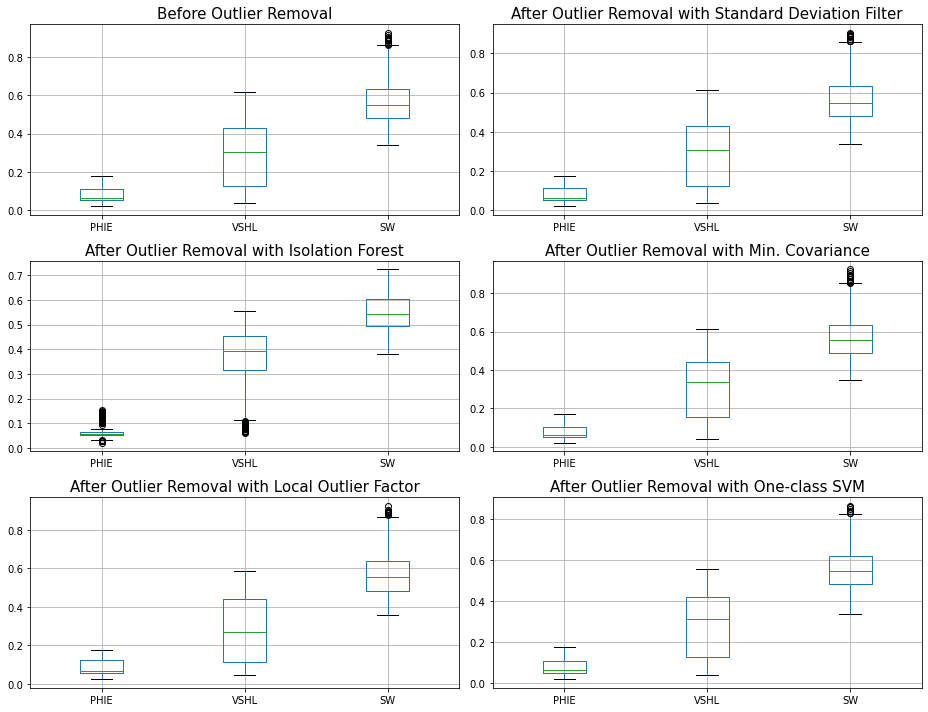

In [13]:
print('Number of points before outliers removed                       :', len(well_08))
print('Number of points after outliers removed with Standard Deviation:', len(well_train_std_8))
print('Number of points after outliers removed with Isolation Forest  :', len(well_train_iso_8))
print('Number of points after outliers removed with Min. Covariance   :', len(well_train_ee_8))
print('Number of points after outliers removed with Outlier Factor    :', len(well_train_lof_8))
print('Number of points after outliers removed with One-class SVM     :', len(well_train_svm_8))

plt.figure(figsize=(13,10))

plt.subplot(3,2,1)
well_08[feature_target].boxplot()
plt.title('Before Outlier Removal', size=15)

plt.subplot(3,2,2)
well_train_std_8[feature_target].boxplot()
plt.title('After Outlier Removal with Standard Deviation Filter', size=15)

plt.subplot(3,2,3)
well_train_iso_8[feature_target].boxplot()
plt.title('After Outlier Removal with Isolation Forest', size=15)

plt.subplot(3,2,4)
well_train_ee_8[feature_target].boxplot()
plt.title('After Outlier Removal with Min. Covariance', size=15)

plt.subplot(3,2,5)
well_train_lof_8[feature_target].boxplot()
plt.title('After Outlier Removal with Local Outlier Factor', size=15)

plt.subplot(3,2,6)
well_train_svm_8[feature_target].boxplot()
plt.title('After Outlier Removal with One-class SVM', size=15)

plt.tight_layout()
plt.show()

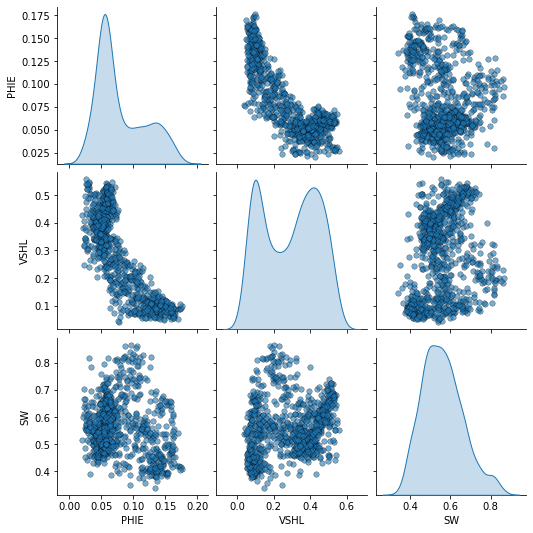

In [14]:
import seaborn as sns
sns.pairplot(well_train_svm_8, vars=feature_target,
             diag_kind='kde',
             plot_kws = {'alpha': 0.6, 's': 30, 'edgecolor': 'k'})

In [123]:
well_train_svm_8

,DEPTH,DPTM,PHIE,SW,VSHL
24587,3126.375,2152.1628,0.3344,0.1984,0.1678
24588,3126.500,2152.2114,0.3279,0.2080,0.1541
24589,3126.625,2152.2595,0.3173,0.2155,0.1565
24590,3126.750,2152.3076,0.3172,0.2148,0.1574
24591,3126.875,2152.3555,0.3232,0.2083,0.1629
...,...,...,...,...,...
26855,3409.875,2299.4766,0.1344,0.3109,0.3716
26856,3410.000,2299.5928,0.1341,0.3049,0.3735
26857,3410.125,2299.7078,0.1309,0.3134,0.3458
26858,3410.250,2299.8230,0.1284,0.3215,0.3365


In [124]:
def avg(well):
    SW=np.array(well['SW'])
    PHIE=np.array(well['PHIE'])
    VSHL=np.array(well['VSHL'])
    lb = 40
    dz = 1.0
    sw_bks, phie_bks, vshl_bks = br.rockphysics.backus(SW, PHIE, VSHL, lb, dz)
    well['SW_smoothed']=sw_bks
    well['PHIE_smoothed']=phie_bks
    well['VSHL_smoothed']=vshl_bks
    fig = plt.figure(figsize=(12,10))

    ax0 = fig.add_subplot(231)
    ax0.plot(well['SW_smoothed'],well['DEPTH'], 'black', alpha=0.8, linewidth = 1, label='SW')
    ax0.legend( loc='best')
    ax0.set_title('Upscaled SW')
    ax0.set_ylabel(r'depth [m]', size=12)
    ax0.invert_yaxis()
    ax0.set_xlabel(r'SW [fraction]', size=12)

    ax1 = fig.add_subplot(232)
    ax1.plot(well['PHIE_smoothed'], well['DEPTH'],'black', alpha=0.8, linewidth = 1, label='SW')
    ax1.legend( loc='best')
    ax1.set_title('Upscaled PHIE')
    ax1.set_ylabel(r'depth [m]', size=12)
    ax1.invert_yaxis()
    ax1.set_xlabel(r' PHIE [fraction]', size=12)

    ax2 = fig.add_subplot(233)
    ax2.plot(well['VSHL_smoothed'], well['DEPTH'],'black', alpha=0.8, linewidth = 1, label='SW')
    ax2.legend( loc='best')
    ax2.set_title('Upscaled VSHL')
    ax2.set_ylabel(r'depth [m]', size=12)
    ax2.invert_yaxis()
    ax2.set_xlabel(r' VSHL [fraction]', size=12)

    ax3 = fig.add_subplot(234)
    ax3.plot(well['SW'], well['DEPTH'],'black', alpha=0.8, linewidth = 1, label='SW')
    ax3.legend( loc='best')
    ax3.set_title('SW')
    ax3.set_ylabel(r'depth [m]', size=12)
    ax3.invert_yaxis()
    ax3.set_xlabel(r' SW [fraction]', size=12)
    
    ax4 = fig.add_subplot(235)
    ax4.plot(well['PHIE'], well['DEPTH'],'black', alpha=0.8, linewidth = 1, label='SW')
    ax4.legend( loc='best')
    ax4.set_title('PHIE')
    ax4.set_ylabel(r'depth [m]', size=12)
    ax4.invert_yaxis()
    ax4.set_xlabel(r' PHIE [fraction]', size=12)

    ax3 = fig.add_subplot(236)
    ax3.plot(well['VSHL'], well['DEPTH'],'black', alpha=0.8, linewidth = 1, label='SW')
    ax3.legend( loc='best')
    ax3.set_title('VSHL')
    ax3.set_ylabel(r'depth [m]', size=12)
    ax3.invert_yaxis()
    ax3.set_xlabel(r' VSHL [fraction]', size=12)




    plt.tight_layout();

C:\Users\hp\AppData\Local\Temp\ipykernel_16732\3574430701.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well['SW_smoothed']=sw_bks
C:\Users\hp\AppData\Local\Temp\ipykernel_16732\3574430701.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well['PHIE_smoothed']=phie_bks
C:\Users\hp\AppData\Local\Temp\ipykernel_16732\3574430701.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

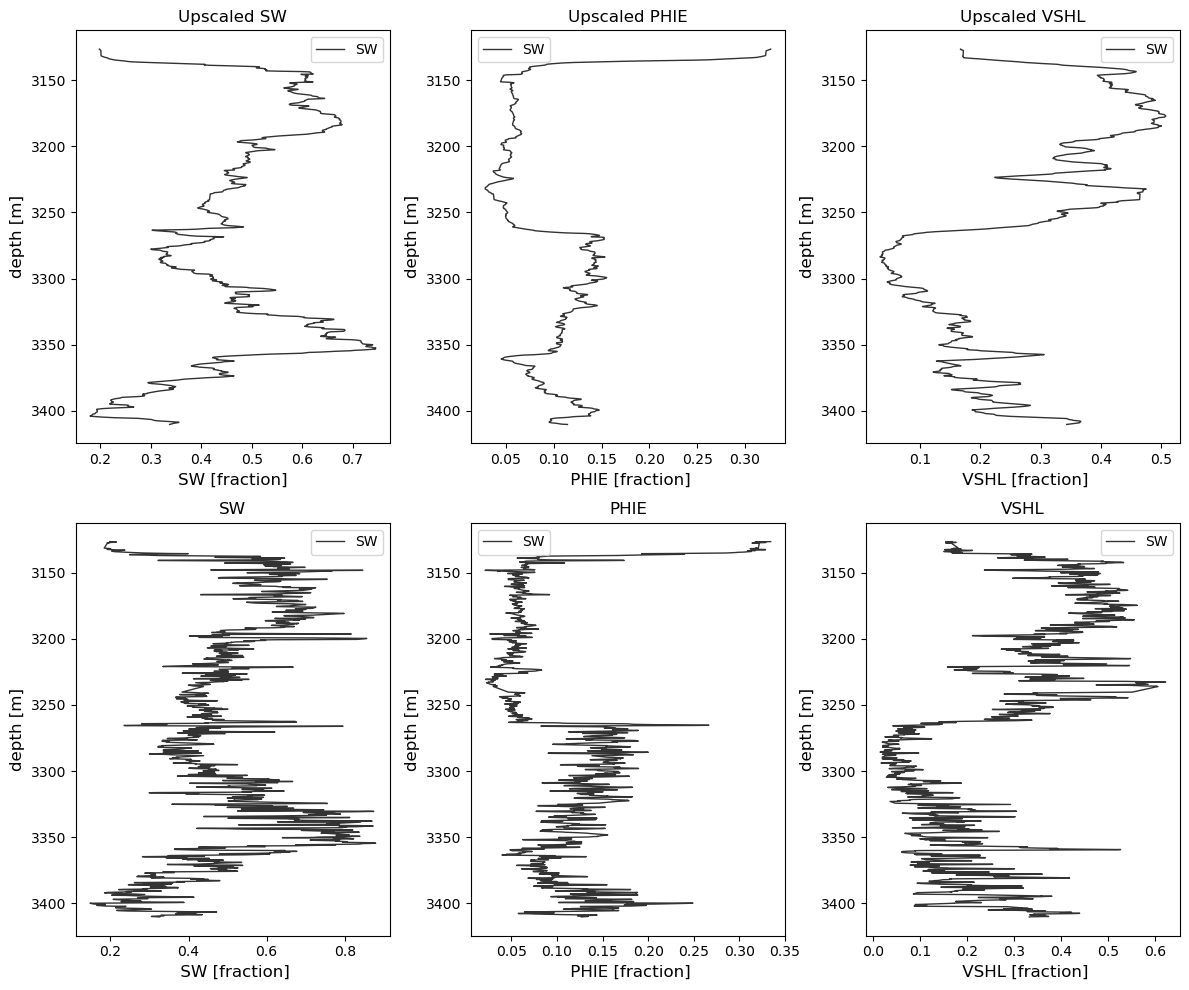

In [125]:
avg(well_train_svm_8)

In [126]:
well_train_svm_8.to_csv('well_08_outliers_removed.csv')

## well_07

In [136]:
well_07= lasio.read(r"C:\Users\hp\Desktop\Machine learning codes\SAWAN-07_logs.las").df().reset_index()

In [137]:
well_07=well_07[(well_07['DPTM']>=2152)&(well_07['DPTM']<=2260)] ## as the seismic twt is from 2152 to 2348

In [138]:
well_07=well_07.dropna()

In [139]:
# make copy of well_train_norm, called well_train_dropped
well_train_drop_07 = well_07.copy()

# on the well_train_drop, drop WELL and DEPTH column
well_train_drop_07 = well_07.drop(['DEPTH','DPTM'], axis=1)
feature_target=['PHIE','VSHL','SW']

In [140]:
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# Method 1: Standard Deviation Method (traditional)
well_train_std_7 = well_train_drop_07[np.abs(well_train_drop_07 - well_train_drop_07.mean()) <= (3 * well_train_drop_07.std())]

## delete all rows that have NaNs
well_train_std_7 = well_train_std_7.dropna()

# Method 2: Isolation Forest
iso = IsolationForest(contamination=0.5)
yhat = iso.fit_predict(well_train_drop_07)
mask = yhat != -1
well_train_iso_7 = well_07[mask]

# Method 3: Minimum Covariance Determinant
ee = EllipticEnvelope(contamination=0.1)
yhat = ee.fit_predict(well_train_drop_07)
mask = yhat != -1
well_train_ee_7 = well_07[mask]

# Method 4: Local Outlier Factor
lof = LocalOutlierFactor(contamination=0.3)
yhat = lof.fit_predict(well_train_drop_07)
mask = yhat != -1
well_train_lof_7 = well_07[mask]

# Method 5: One-class SVM
svm = OneClassSVM(nu=0.1)
yhat = svm.fit_predict(well_train_drop_07)
mask = yhat != -1
well_train_svm_7 = well_07[mask]

C:\Users\hp\anaconda3\envs\seismic\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Number of points before outliers removed                       : 1094
Number of points after outliers removed with Standard Deviation: 1080
Number of points after outliers removed with Isolation Forest  : 547
Number of points after outliers removed with Min. Covariance   : 984
Number of points after outliers removed with Outlier Factor    : 766
Number of points after outliers removed with One-class SVM     : 984


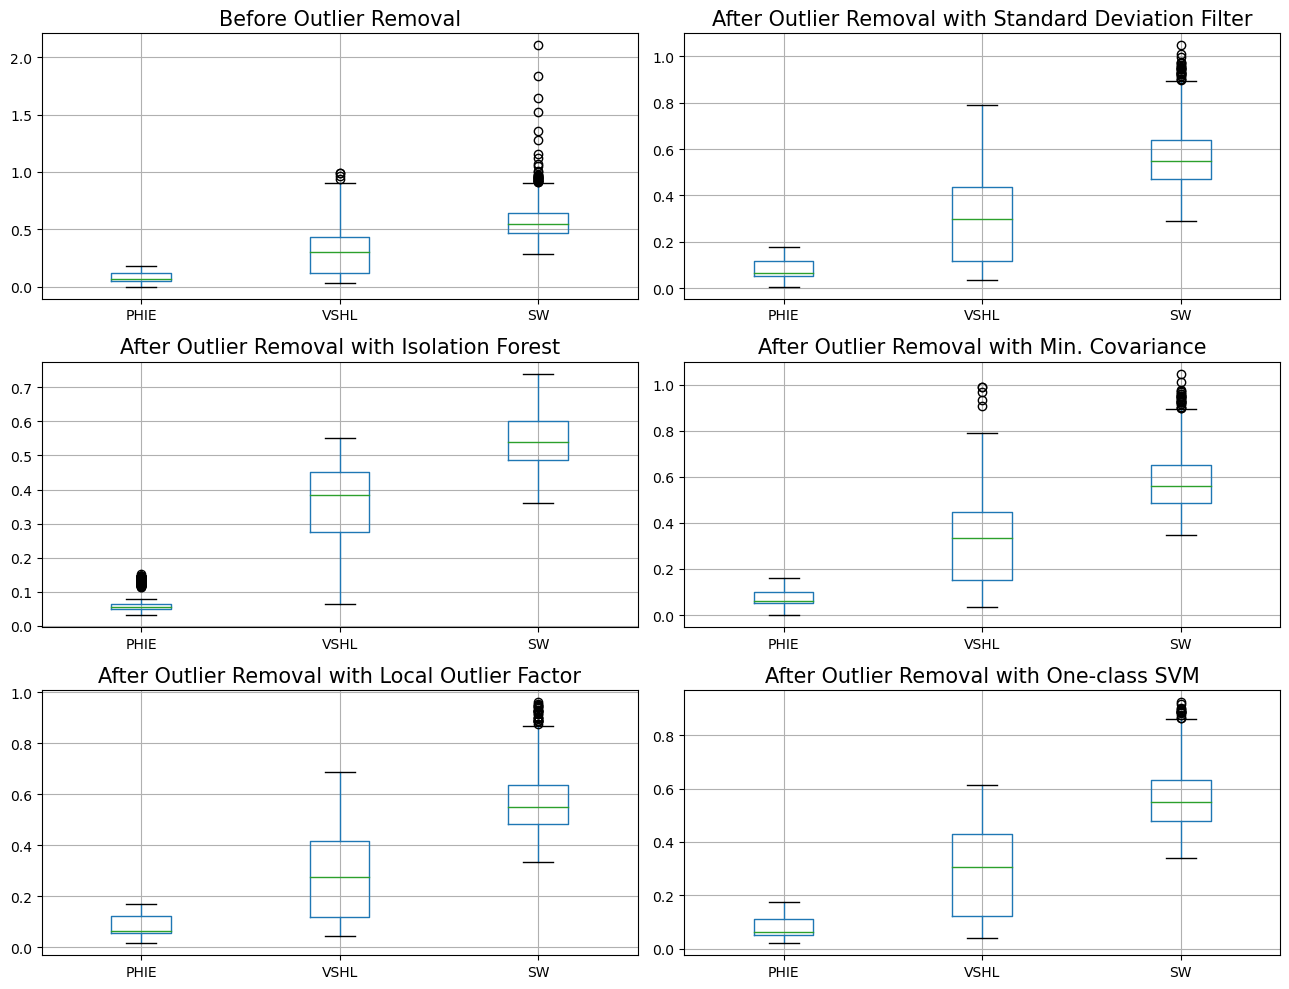

In [141]:
print('Number of points before outliers removed                       :', len(well_07))
print('Number of points after outliers removed with Standard Deviation:', len(well_train_std_7))
print('Number of points after outliers removed with Isolation Forest  :', len(well_train_iso_7))
print('Number of points after outliers removed with Min. Covariance   :', len(well_train_ee_7))
print('Number of points after outliers removed with Outlier Factor    :', len(well_train_lof_7))
print('Number of points after outliers removed with One-class SVM     :', len(well_train_svm_7))

plt.figure(figsize=(13,10))

plt.subplot(3,2,1)
well_07[feature_target].boxplot()
plt.title('Before Outlier Removal', size=15)

plt.subplot(3,2,2)
well_train_std_7[feature_target].boxplot()
plt.title('After Outlier Removal with Standard Deviation Filter', size=15)

plt.subplot(3,2,3)
well_train_iso_7[feature_target].boxplot()
plt.title('After Outlier Removal with Isolation Forest', size=15)

plt.subplot(3,2,4)
well_train_ee_7[feature_target].boxplot()
plt.title('After Outlier Removal with Min. Covariance', size=15)

plt.subplot(3,2,5)
well_train_lof_7[feature_target].boxplot()
plt.title('After Outlier Removal with Local Outlier Factor', size=15)

plt.subplot(3,2,6)
well_train_svm_7[feature_target].boxplot()
plt.title('After Outlier Removal with One-class SVM', size=15)

plt.tight_layout()
plt.show()

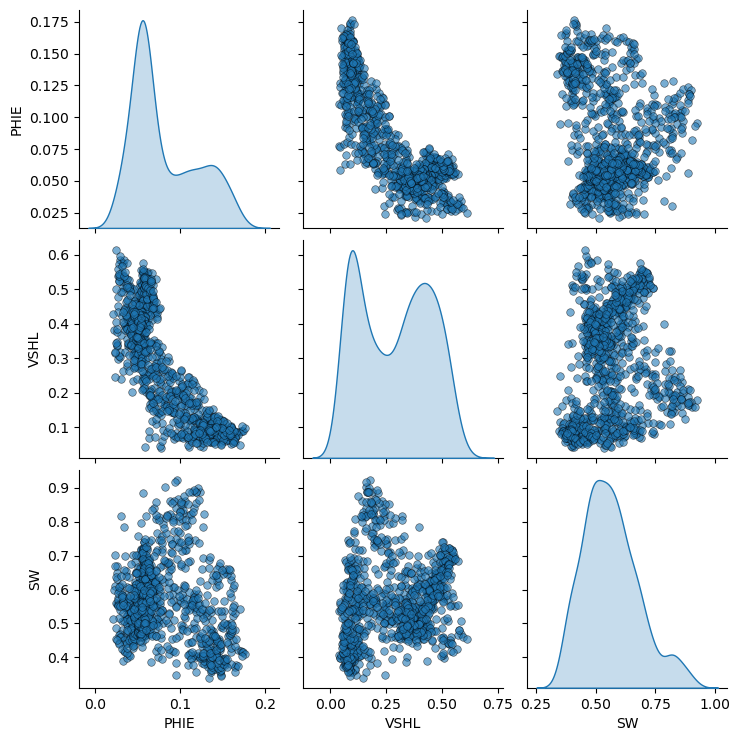

In [142]:
import seaborn as sns
sns.pairplot(well_train_svm_7, vars=feature_target,
             diag_kind='kde',
             plot_kws = {'alpha': 0.6, 's': 30, 'edgecolor': 'k'})

C:\Users\hp\AppData\Local\Temp\ipykernel_16732\3574430701.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well['SW_smoothed']=sw_bks
C:\Users\hp\AppData\Local\Temp\ipykernel_16732\3574430701.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well['PHIE_smoothed']=phie_bks
C:\Users\hp\AppData\Local\Temp\ipykernel_16732\3574430701.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

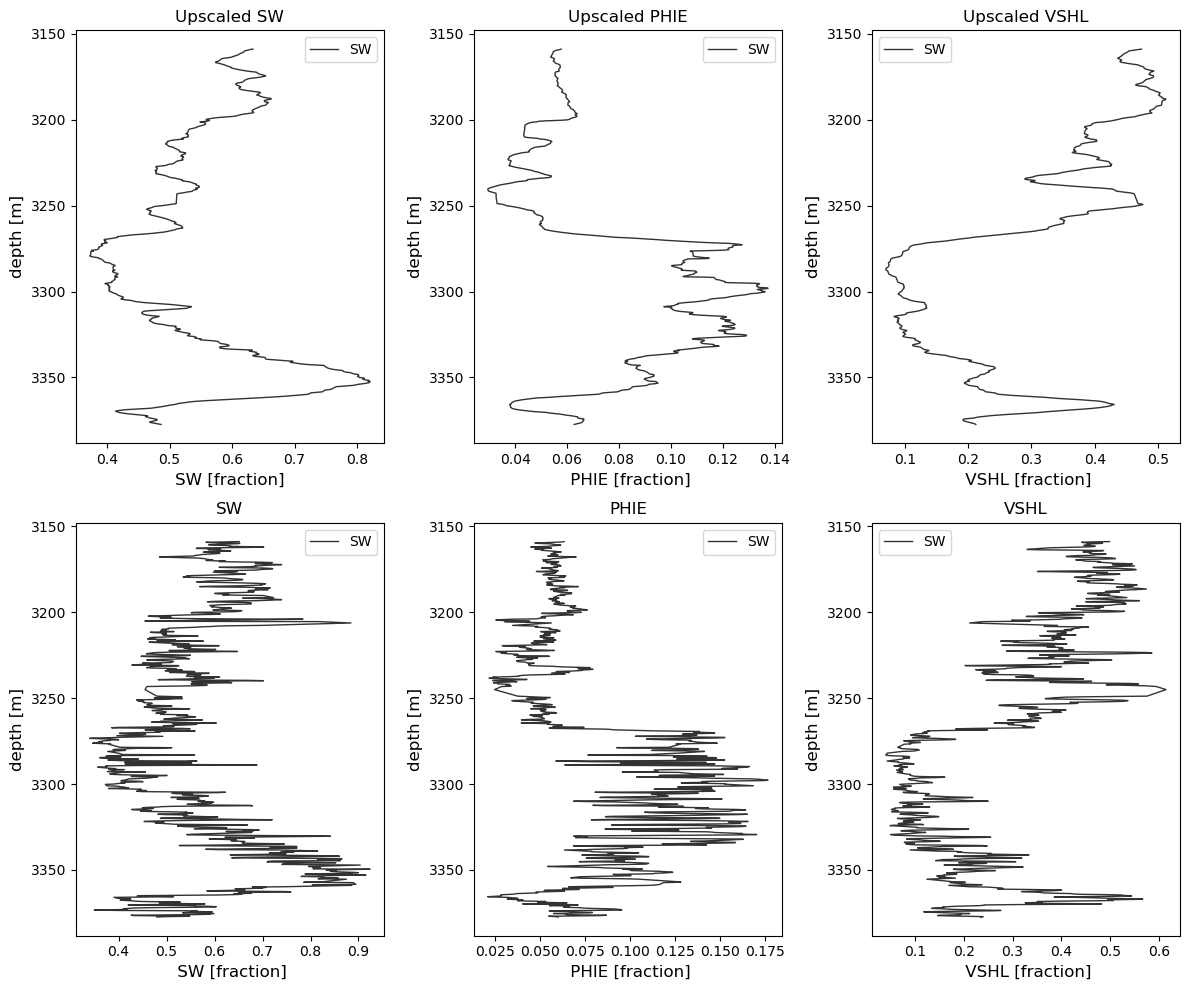

In [143]:
avg(well_train_svm_7)

In [144]:
well_train_svm_7.to_csv('well_07_outliers_removed.csv')

## well_02

In [145]:
well_02= lasio.read(r"C:\Users\hp\Desktop\Machine learning codes\SAWAN-02_logs.las").df().reset_index()

In [146]:
well_02["xline"]=972

In [147]:
well_02=well_02[(well_02['DPTM']>=2152)&(well_02['DPTM']<=2264)] ## as the seismic twt is from 2152 to 2348

In [148]:
# make copy of well_train_norm, called well_train_dropped
well_train_drop_02 = well_02.copy()

# on the well_train_drop, drop WELL and DEPTH column
well_train_drop_02 = well_02.drop(['xline','DEPTH','DPTM'], axis=1)
feature_target=['PHIE','VSHL','SW']

In [149]:
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# Method 1: Standard Deviation Method (traditional)
well_train_std_2 = well_train_drop_02[np.abs(well_train_drop_02 - well_train_drop_02.mean()) <= (3 * well_train_drop_02.std())]

## delete all rows that have NaNs
well_train_std_2 = well_train_std_2.dropna()

# Method 2: Isolation Forest
iso = IsolationForest(contamination=0.5)
yhat = iso.fit_predict(well_train_drop_02)
mask = yhat != -1
well_train_iso_2 = well_02[mask]

# Method 3: Minimum Covariance Determinant
ee = EllipticEnvelope(contamination=0.1)
yhat = ee.fit_predict(well_train_drop_02)
mask = yhat != -1
well_train_ee_2 = well_02[mask]

# Method 4: Local Outlier Factor
lof = LocalOutlierFactor(contamination=0.3)
yhat = lof.fit_predict(well_train_drop_02)
mask = yhat != -1
well_train_lof_2 = well_02[mask]

# Method 5: One-class SVM
svm = OneClassSVM(nu=0.1)
yhat = svm.fit_predict(well_train_drop_02)
mask = yhat != -1
well_train_svm_2 = well_02[mask]

C:\Users\hp\anaconda3\envs\seismic\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Number of points before outliers removed                       : 1386
Number of points after outliers removed with Standard Deviation: 1343
Number of points after outliers removed with Isolation Forest  : 693
Number of points after outliers removed with Min. Covariance   : 1247
Number of points after outliers removed with Outlier Factor    : 970
Number of points after outliers removed with One-class SVM     : 1249


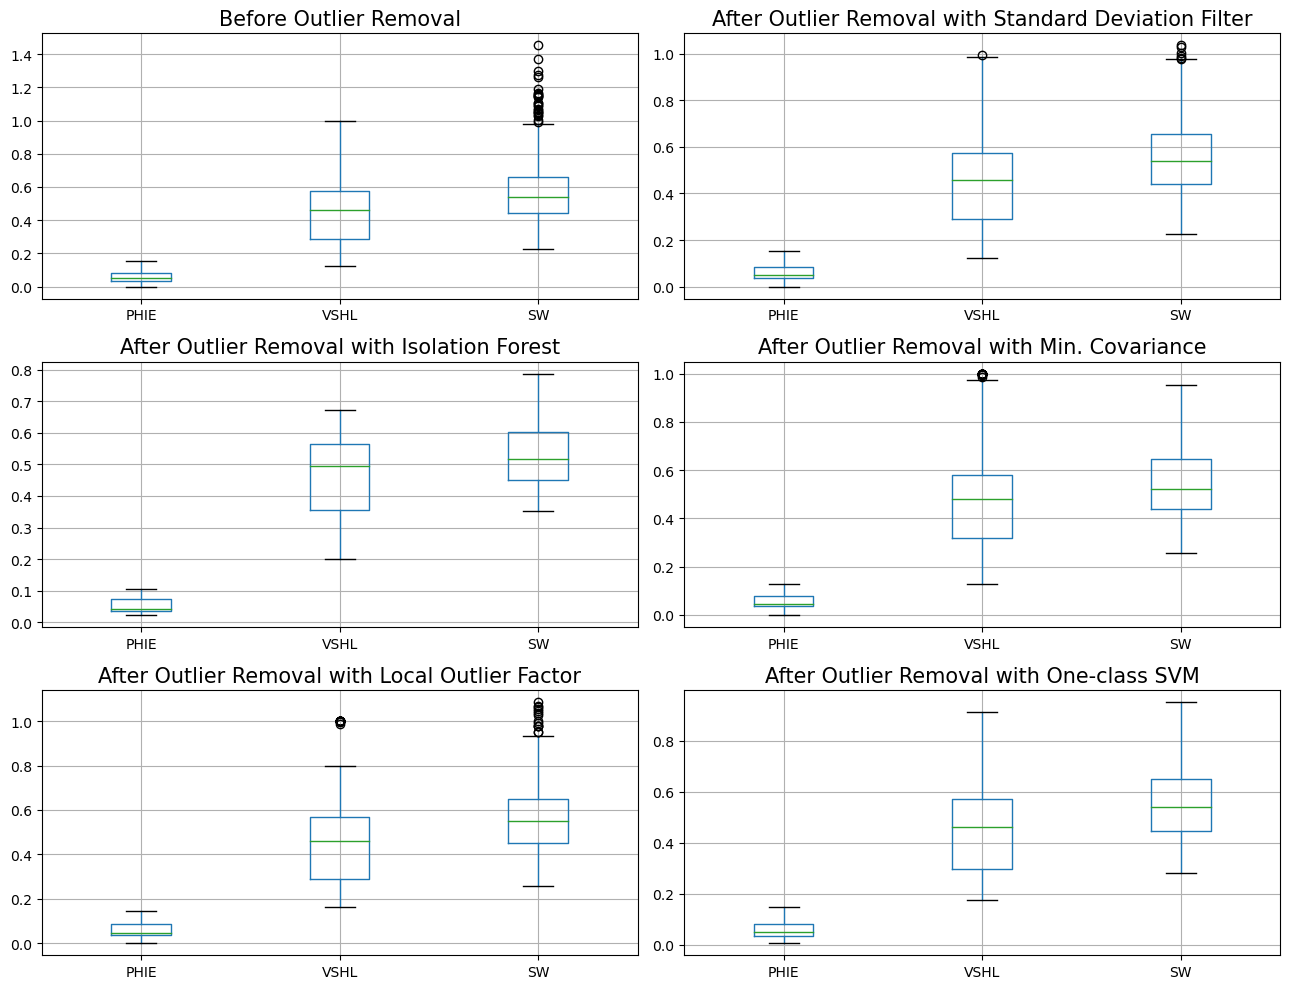

In [150]:
print('Number of points before outliers removed                       :', len(well_02))
print('Number of points after outliers removed with Standard Deviation:', len(well_train_std_2))
print('Number of points after outliers removed with Isolation Forest  :', len(well_train_iso_2))
print('Number of points after outliers removed with Min. Covariance   :', len(well_train_ee_2))
print('Number of points after outliers removed with Outlier Factor    :', len(well_train_lof_2))
print('Number of points after outliers removed with One-class SVM     :', len(well_train_svm_2))

plt.figure(figsize=(13,10))

plt.subplot(3,2,1)
well_02[feature_target].boxplot()
plt.title('Before Outlier Removal', size=15)

plt.subplot(3,2,2)
well_train_std_2[feature_target].boxplot()
plt.title('After Outlier Removal with Standard Deviation Filter', size=15)

plt.subplot(3,2,3)
well_train_iso_2[feature_target].boxplot()
plt.title('After Outlier Removal with Isolation Forest', size=15)

plt.subplot(3,2,4)
well_train_ee_2[feature_target].boxplot()
plt.title('After Outlier Removal with Min. Covariance', size=15)

plt.subplot(3,2,5)
well_train_lof_2[feature_target].boxplot()
plt.title('After Outlier Removal with Local Outlier Factor', size=15)

plt.subplot(3,2,6)
well_train_svm_2[feature_target].boxplot()
plt.title('After Outlier Removal with One-class SVM', size=15)

plt.tight_layout()
plt.show()

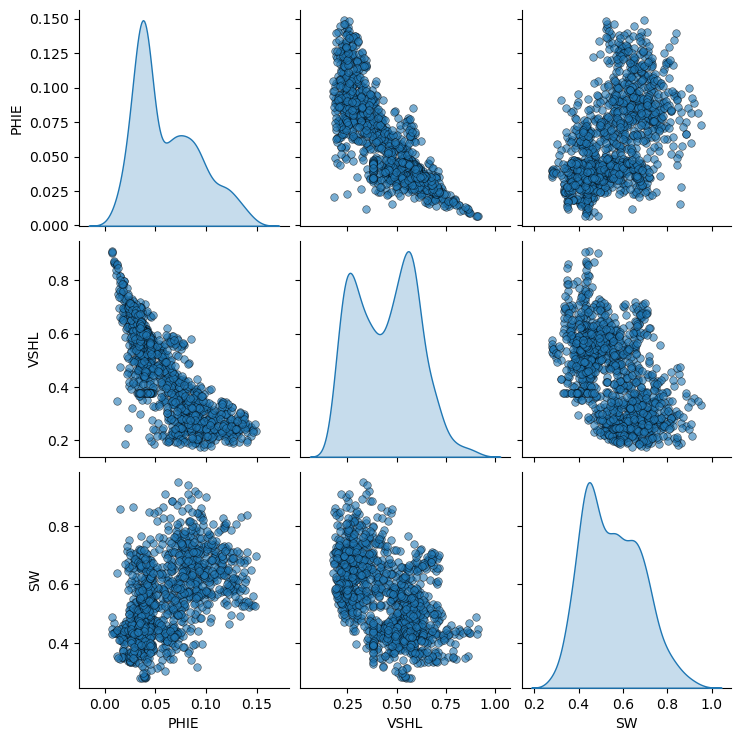

In [151]:
import seaborn as sns
sns.pairplot(well_train_svm_2, vars=feature_target,
             diag_kind='kde',
             plot_kws = {'alpha': 0.6, 's': 30, 'edgecolor': 'k'})

C:\Users\hp\AppData\Local\Temp\ipykernel_16732\3574430701.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well['SW_smoothed']=sw_bks
C:\Users\hp\AppData\Local\Temp\ipykernel_16732\3574430701.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well['PHIE_smoothed']=phie_bks
C:\Users\hp\AppData\Local\Temp\ipykernel_16732\3574430701.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

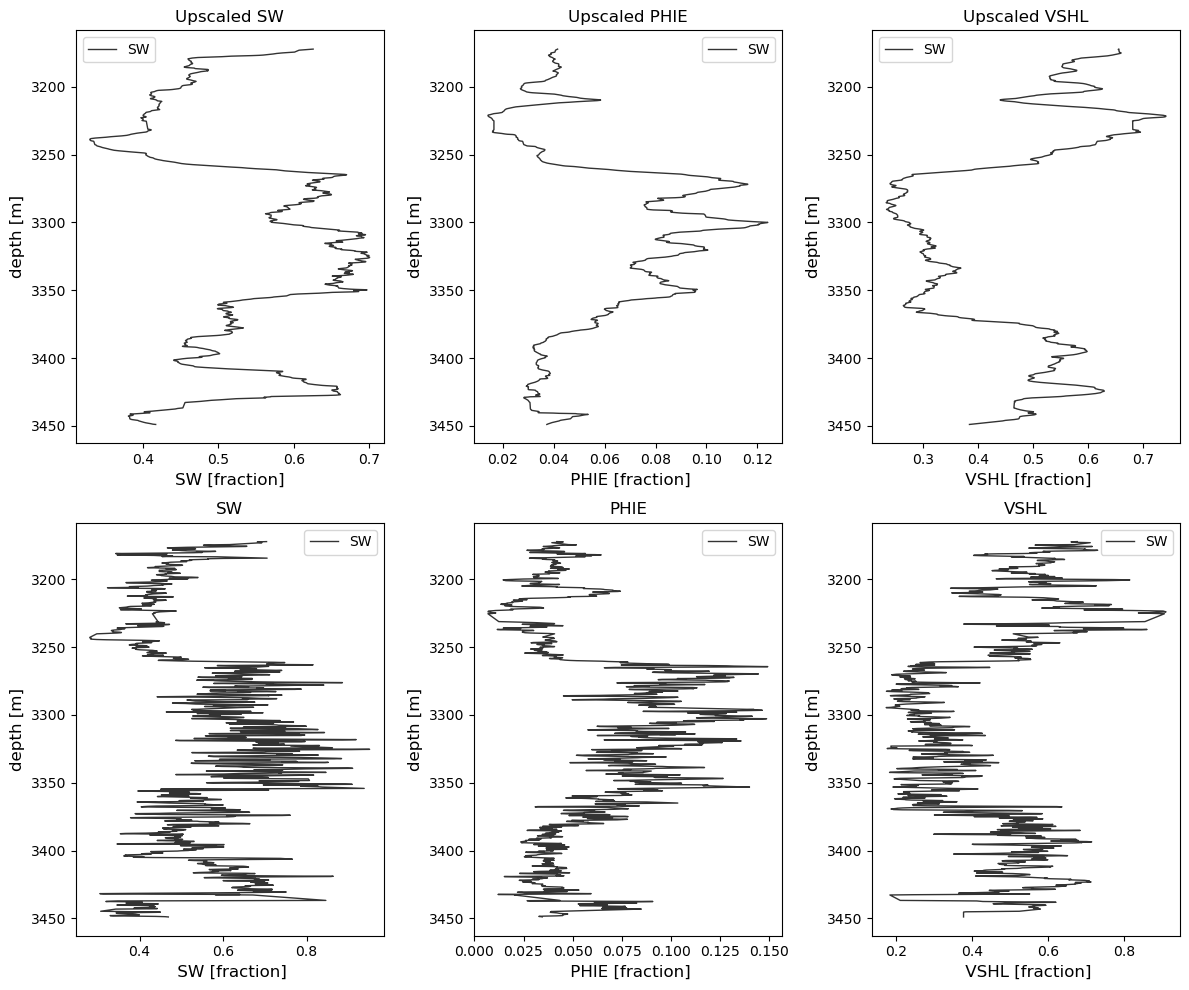

In [152]:
avg(well_train_svm_2)

In [153]:
well_train_svm_2.to_csv('well_02_outliers_removed.csv')

## Well 01

In [154]:
#well_01= lasio.read(r"C:\Users\hp\Desktop\Machine learning codes\SAWAN-01_logs.las").df().reset_index()
#well_01  #WELL LOAD WITH DPTM (TD CHART)

In [155]:
well_01=well_01[(well_01['DPTM']>=2152) & (well_01['DPTM']<=2330)] ## as the seismic twt is from 2152 to 2348

In [156]:
# make copy of well_train_norm, called well_train_dropped
well_train_drop_01 = well_01.copy()

# on the well_train_drop, drop WELL and DEPTH column
well_train_drop_01 = well_01.drop(['DEPTH','DPTM'], axis=1)
feature_target=['PHIE','VSHL','SW']

In [157]:
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# Method 1: Standard Deviation Method (traditional)
well_train_std = well_train_drop_01[np.abs(well_train_drop_01 - well_train_drop_01.mean()) <= (3 * well_train_drop_01.std())]

## delete all rows that have NaNs
well_train_std = well_train_std.dropna()

# Method 2: Isolation Forest
iso = IsolationForest(contamination=0.5)
yhat = iso.fit_predict(well_train_drop_01)
mask = yhat != -1
well_train_iso = well_01[mask]

# Method 3: Minimum Covariance Determinant
ee = EllipticEnvelope(contamination=0.1)
yhat = ee.fit_predict(well_train_drop_01)
mask = yhat != -1
well_train_ee = well_01[mask]

# Method 4: Local Outlier Factor
lof = LocalOutlierFactor(contamination=0.3)
yhat = lof.fit_predict(well_train_drop_01)
mask = yhat != -1
well_train_lof = well_01[mask]

# Method 5: One-class SVM
svm = OneClassSVM(nu=0.1)
yhat = svm.fit_predict(well_train_drop_01)
mask = yhat != -1
well_train_svm = well_01[mask]

C:\Users\hp\anaconda3\envs\seismic\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


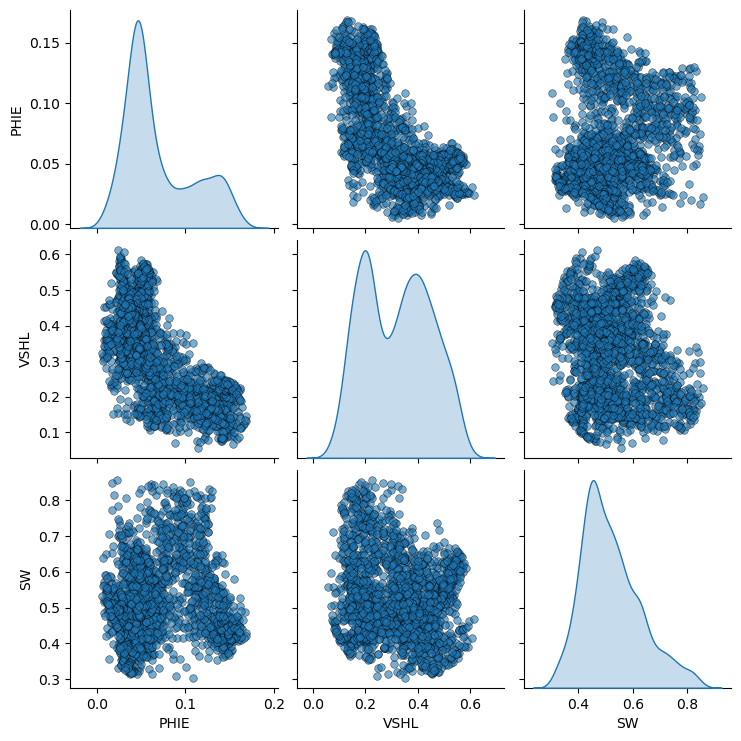

In [158]:
import seaborn as sns
sns.pairplot(well_train_svm, vars=feature_target,
             diag_kind='kde',
             plot_kws = {'alpha': 0.6, 's': 30, 'edgecolor': 'k'})
     

Number of points before outliers removed                       : 2583
Number of points after outliers removed with Standard Deviation: 2545
Number of points after outliers removed with Isolation Forest  : 1292
Number of points after outliers removed with Min. Covariance   : 2324
Number of points after outliers removed with Outlier Factor    : 1808
Number of points after outliers removed with One-class SVM     : 2325


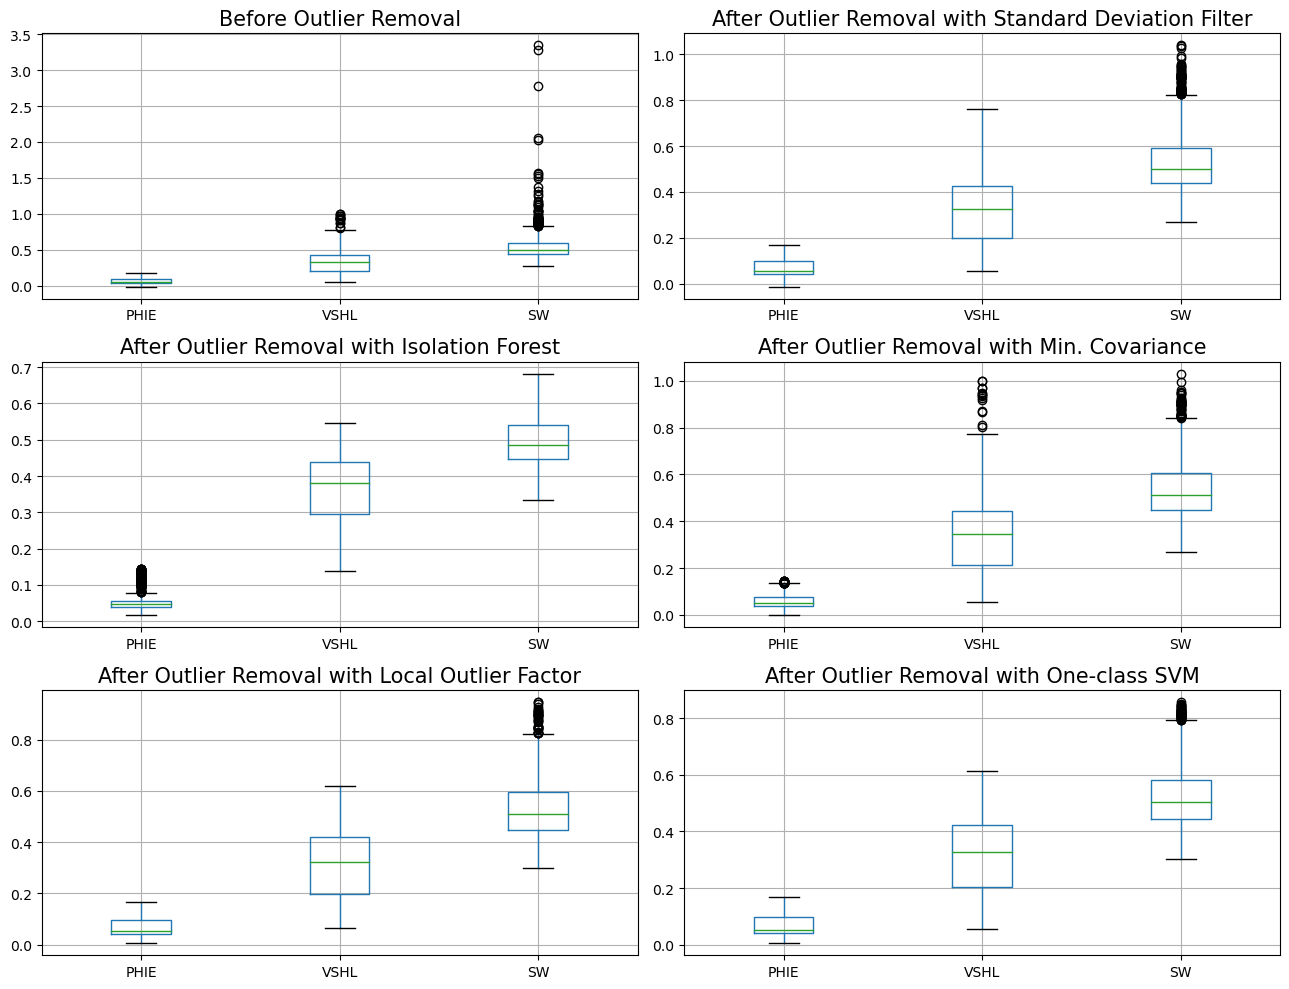

In [159]:
print('Number of points before outliers removed                       :', len(well_01))
print('Number of points after outliers removed with Standard Deviation:', len(well_train_std))
print('Number of points after outliers removed with Isolation Forest  :', len(well_train_iso))
print('Number of points after outliers removed with Min. Covariance   :', len(well_train_ee))
print('Number of points after outliers removed with Outlier Factor    :', len(well_train_lof))
print('Number of points after outliers removed with One-class SVM     :', len(well_train_svm))

plt.figure(figsize=(13,10))

plt.subplot(3,2,1)
well_01[feature_target].boxplot()
plt.title('Before Outlier Removal', size=15)

plt.subplot(3,2,2)
well_train_std[feature_target].boxplot()
plt.title('After Outlier Removal with Standard Deviation Filter', size=15)

plt.subplot(3,2,3)
well_train_iso[feature_target].boxplot()
plt.title('After Outlier Removal with Isolation Forest', size=15)

plt.subplot(3,2,4)
well_train_ee[feature_target].boxplot()
plt.title('After Outlier Removal with Min. Covariance', size=15)

plt.subplot(3,2,5)
well_train_lof[feature_target].boxplot()
plt.title('After Outlier Removal with Local Outlier Factor', size=15)

plt.subplot(3,2,6)
well_train_svm[feature_target].boxplot()
plt.title('After Outlier Removal with One-class SVM', size=15)

plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_16732\3574430701.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well['SW_smoothed']=sw_bks
C:\Users\hp\AppData\Local\Temp\ipykernel_16732\3574430701.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well['PHIE_smoothed']=phie_bks
C:\Users\hp\AppData\Local\Temp\ipykernel_16732\3574430701.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

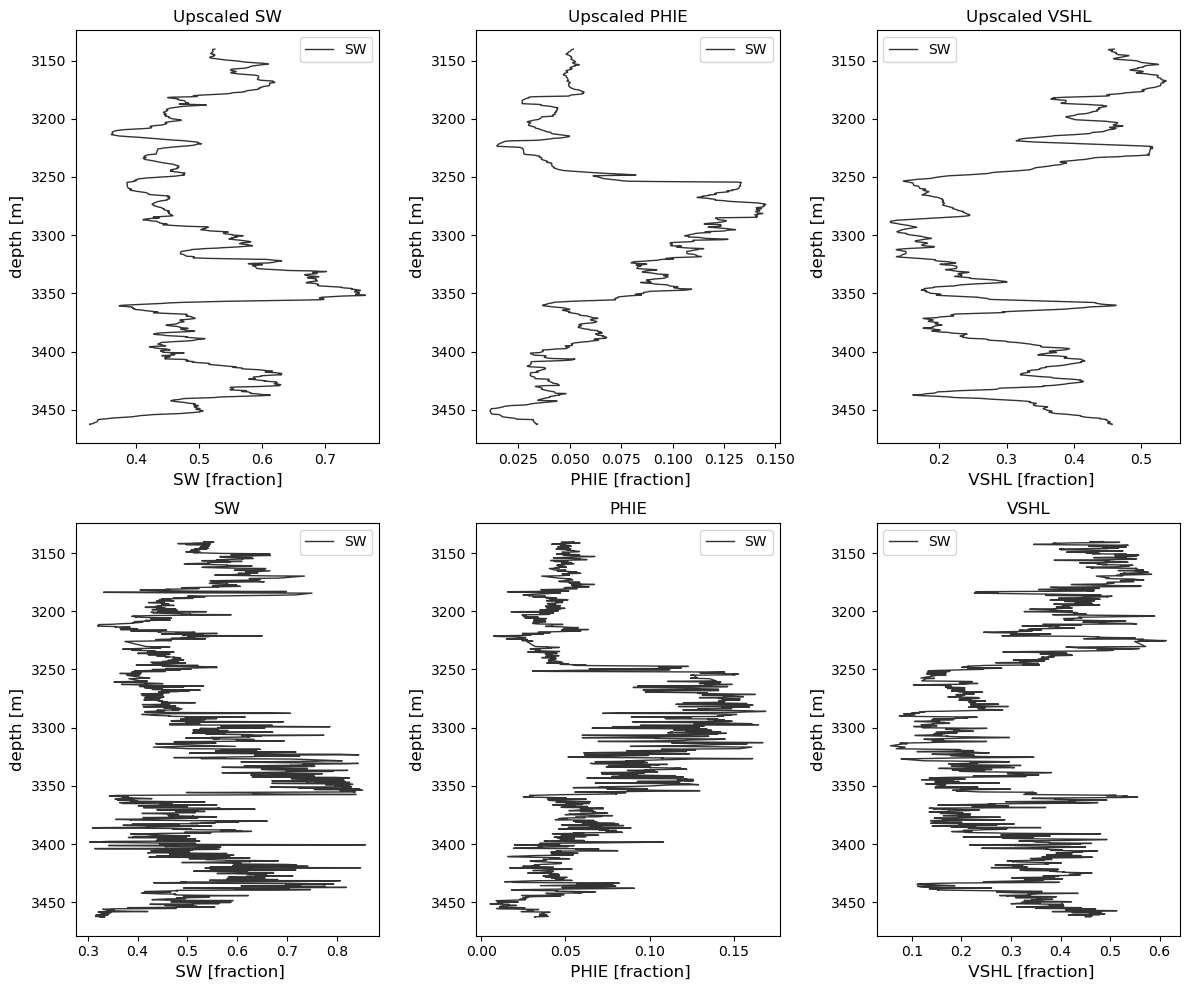

In [160]:
avg(well_train_svm)

In [162]:
well_train_svm.to_csv('well_01_outliers_removed.csv')